In [10]:
############ LOAD in custom packages ################
import sys
import os
import pandas as pd
import numpy as np
import importlib
from fastdtw import dtw

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Define data directory
brighten_dir = os.path.join(project_root, 'BRIGHTEN_data')

# Add project root to sys.path
sys.path.append(project_root)

# Import and reload custom scripts
from scripts import preprocessing as pre
from scripts import visualization as vis
from scripts import feature_selection as fs
from scripts import clustering as cl
from scripts import variables as var
importlib.reload(pre)
importlib.reload(vis)
importlib.reload(fs)
importlib.reload(cl)
importlib.reload(var)

################ DEFINE column variables from data ###################
from scripts.variables import id_columns, daily_cols_v1, daily_v2_common 
from scripts.variables import phq2_cols, phq9_cols, weekly_cols, passive_cols, survey_cols
from scripts.variables import df_names, df_mis, df_names_with_mis





DATAFRAME: v1_day_mis
In df there are 233 subjects.


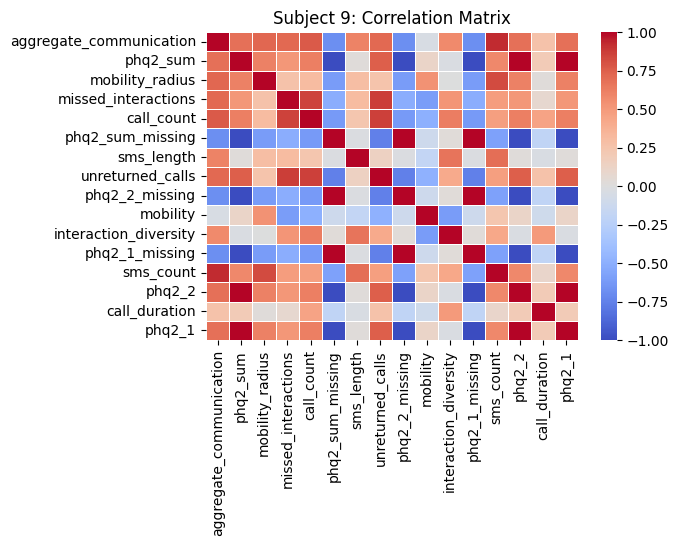

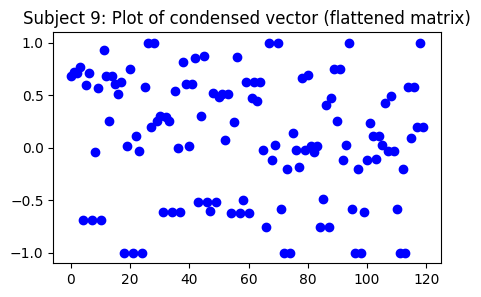

229 subs with symptom matrices
229 filled condensed arrays


DATAFRAME: v2_day_mis
In df there are 65 subjects.


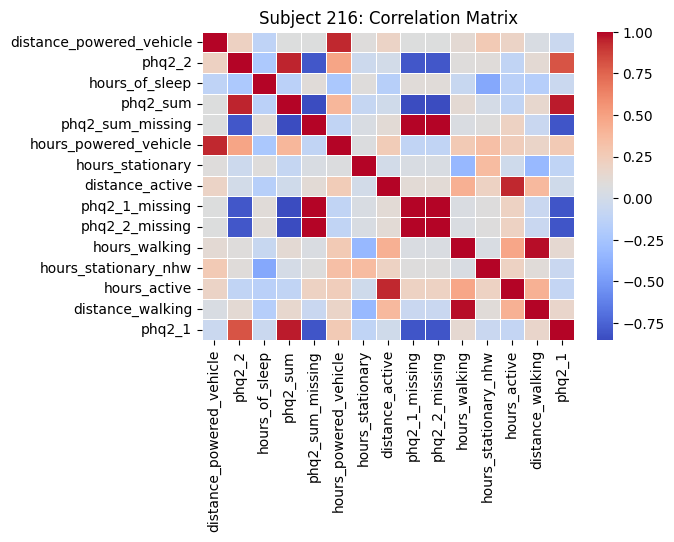

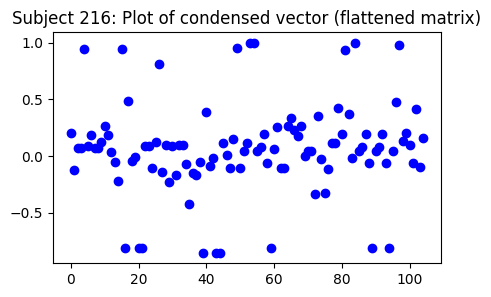

65 subs with symptom matrices
65 filled condensed arrays


DATAFRAME: v1_week_mis
In df there are 233 subjects.


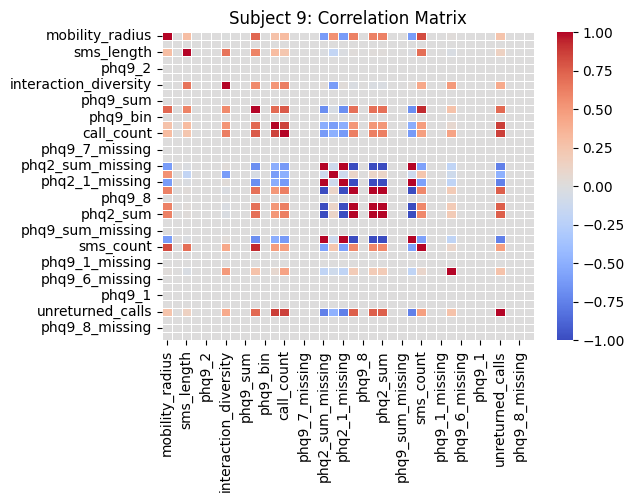

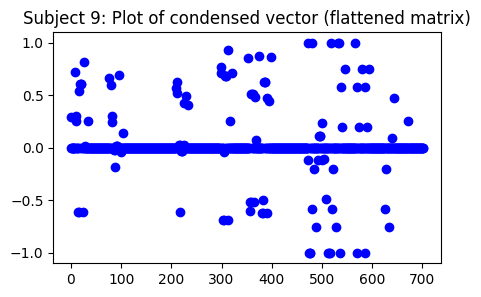

229 subs with symptom matrices
229 filled condensed arrays


DATAFRAME: v2_week_mis
In df there are 65 subjects.


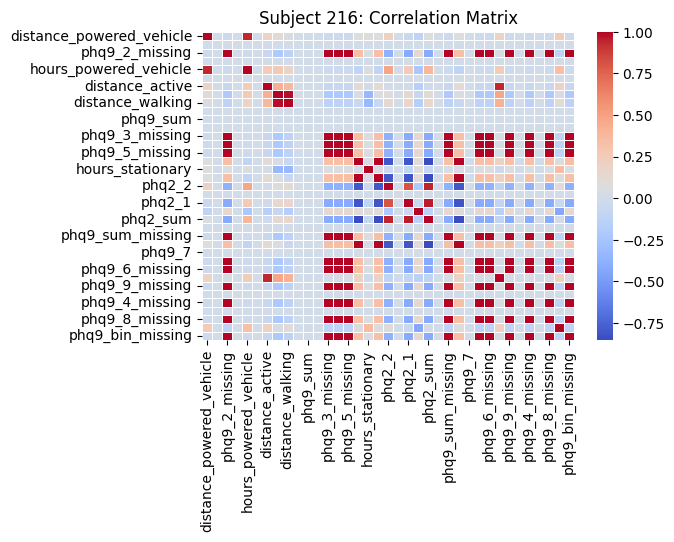

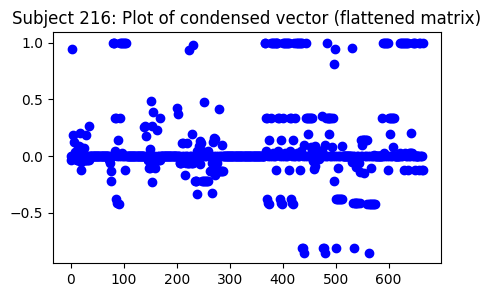

65 subs with symptom matrices
65 filled condensed arrays


In [11]:
#### Take the average of each subject's symptom correlation and use it to make clusters of variables
symptom_matrices_df_dict = {}
flattened_matrices_df_dict = {}
demographic_vars = ['gender','education','race','age']                # covariates


# Create dicts of all subjects' correlation matrices
for name in df_mis:
    df_scaled = pd.read_csv(os.path.join(brighten_dir, f'{name}_scaled.csv'))
    print(f'\n\nDATAFRAME: {name}')
    ignore_cols = demographic_vars + id_columns
    symptom_matrix_dict, flattened_matrix_dict = fs.make_symptom_matrices(df_scaled, ignore_cols, num_to_plot=1)
    symptom_matrices_df_dict[name] = symptom_matrix_dict
    flattened_matrices_df_dict[name] = flattened_matrix_dict



/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


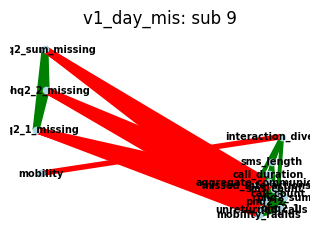

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


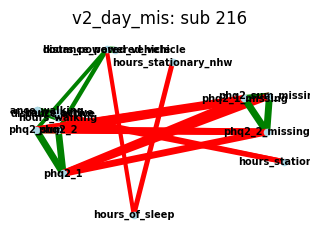

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


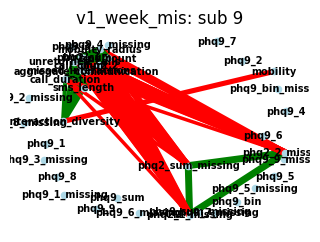

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


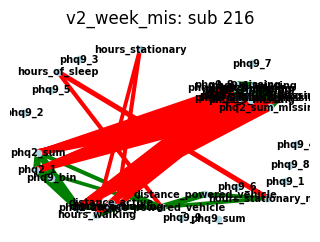

In [12]:
############### Plot individual networks of symptom matrices #################

for name, df_dict in symptom_matrices_df_dict.items():
    count=0
    for sub, corr_matrix in df_dict.items():
        if count<1:
            fs.plot_network(corr_matrix, title=f'{name}: sub {sub}')
            count=+1

In [13]:
# Double check where 'labels' are for columns
symptom_matrices_df_dict['v1_day_mis'][list(symptom_matrices_df_dict['v1_day_mis'].keys())[0]].index

Index(['aggregate_communication', 'phq2_sum', 'mobility_radius',
       'missed_interactions', 'call_count', 'phq2_sum_missing', 'sms_length',
       'unreturned_calls', 'phq2_2_missing', 'mobility',
       'interaction_diversity', 'phq2_1_missing', 'sms_count', 'phq2_2',
       'call_duration', 'phq2_1'],
      dtype='object')

v1_day_mis
(16, 16) variables included


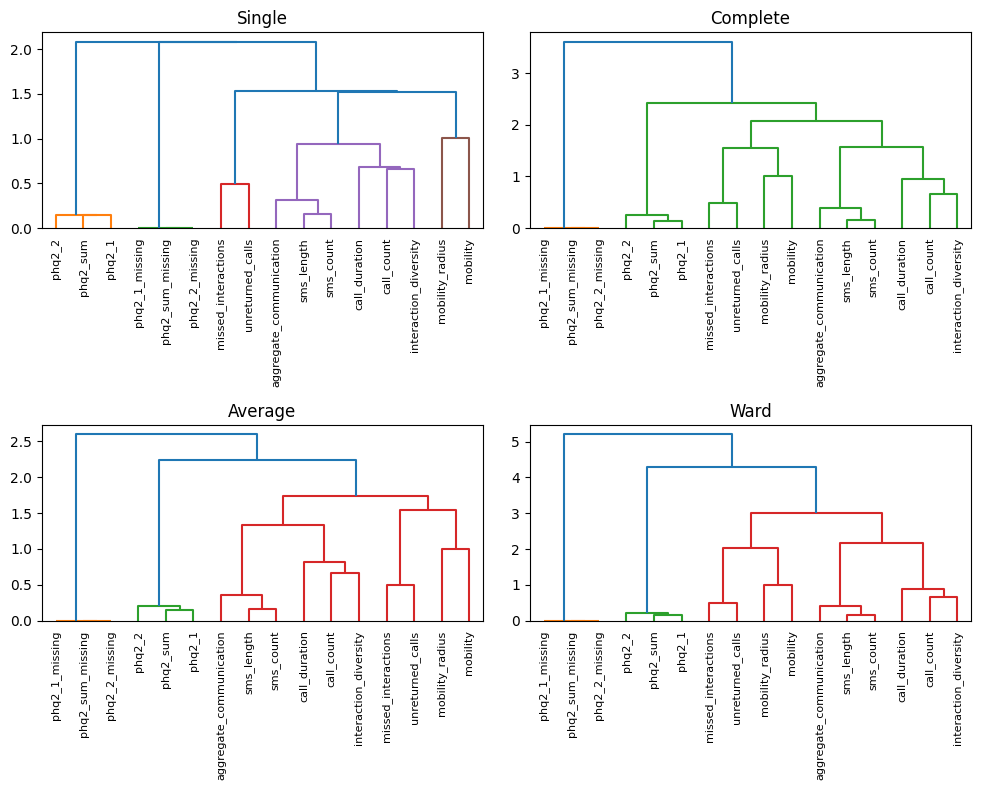

v2_day_mis
(15, 15) variables included


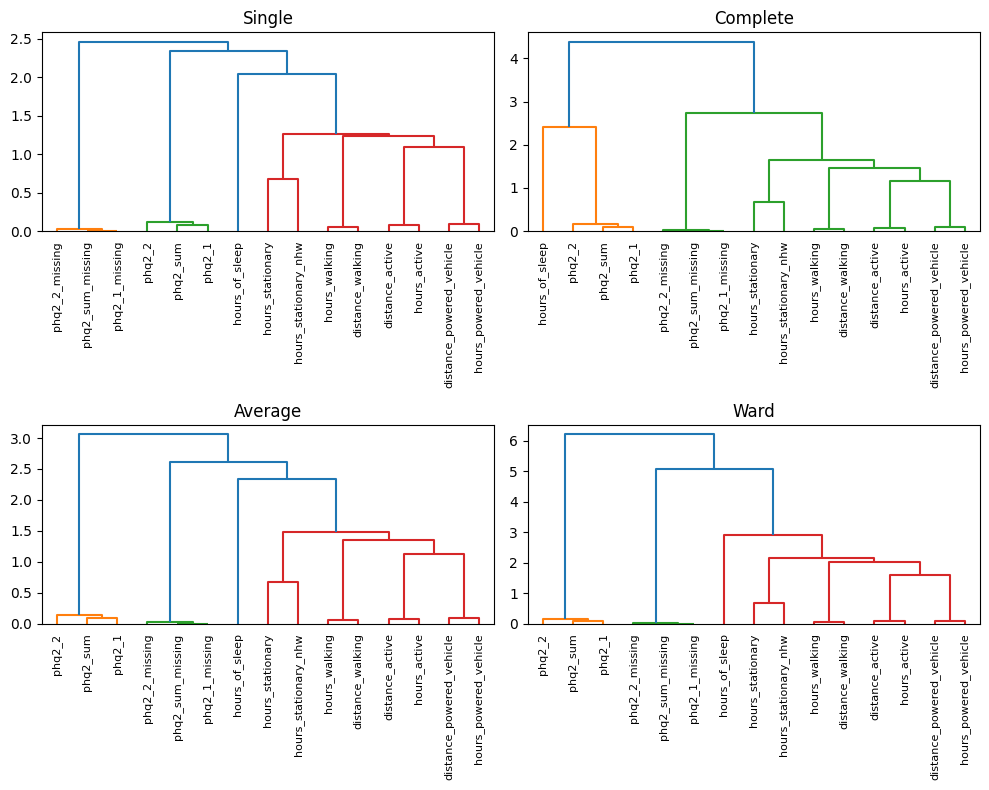

v1_week_mis
(38, 38) variables included


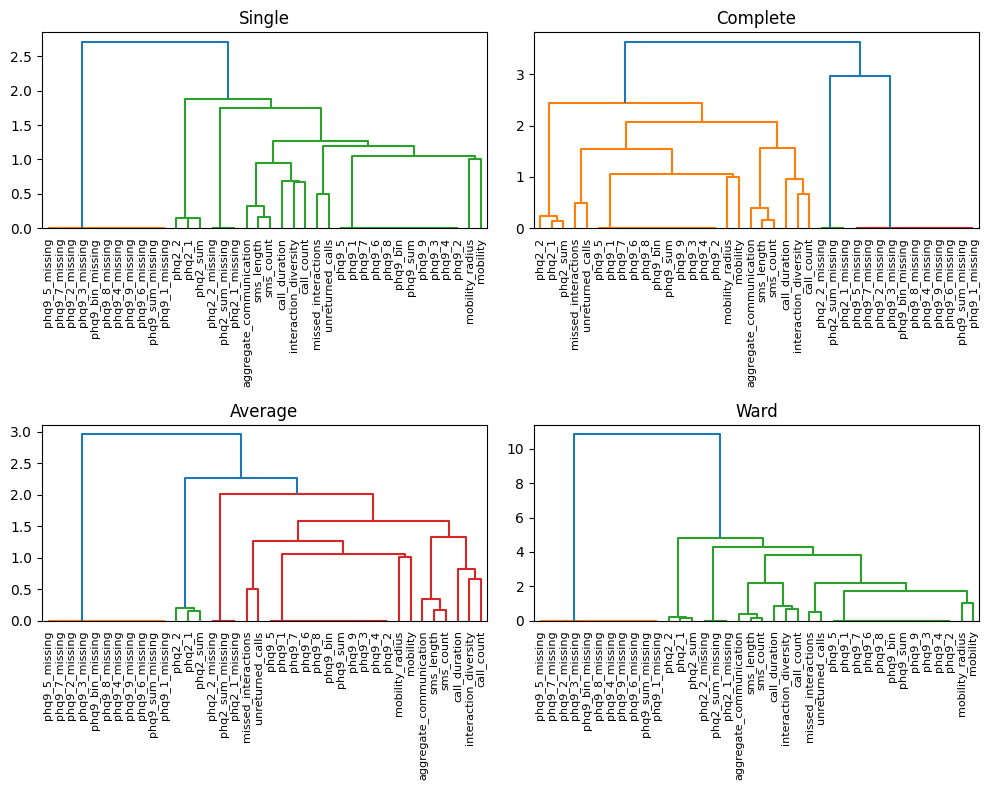

v2_week_mis
(37, 37) variables included


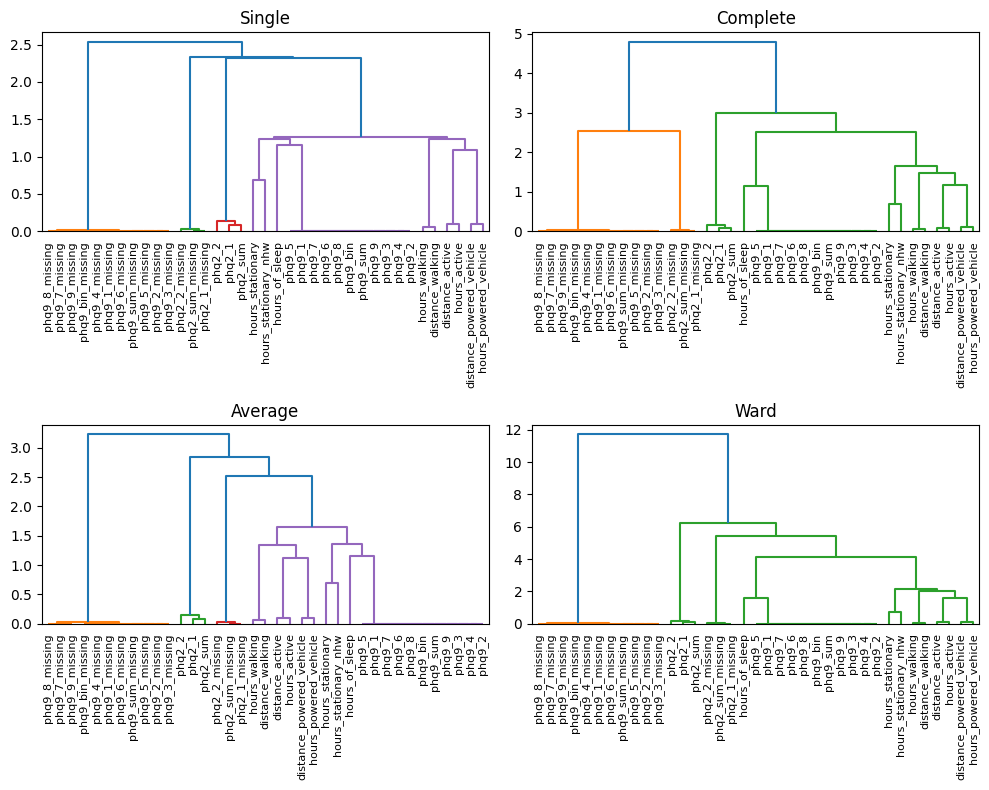

In [14]:
## Plot options
for name, df in symptom_matrices_df_dict.items():
    avg_matrix = fs.average_matrix(df)
    fs.plot_hier_agg(avg_matrix, df[list(df.keys())[0]].index, is_dict=False, group_title=f'{name}') # 3, ward


It seems the missing columns make noise into the clusters and make them too big, especially for the PHQ9 clusters.

Let's lesion out all but the "sum" and "bin" columns.



DATAFRAME: v1_day_mis
dropping cols: ['phq2_1', 'phq2_2', 'phq2_1_missing', 'phq2_2_missing']
In df there are 233 subjects.


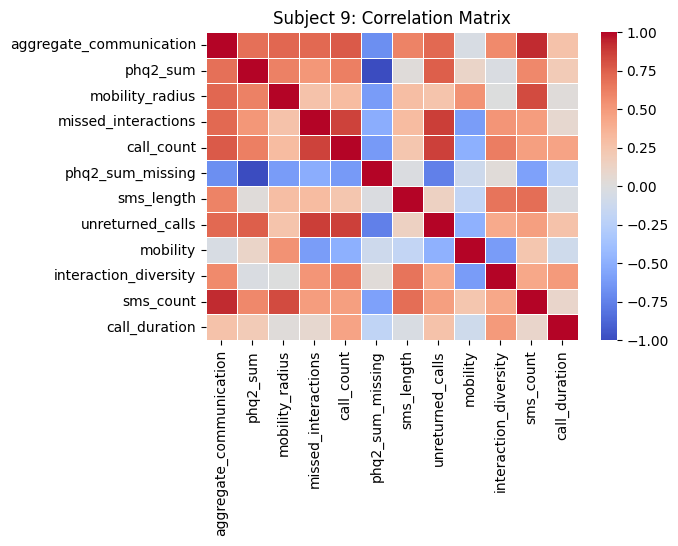

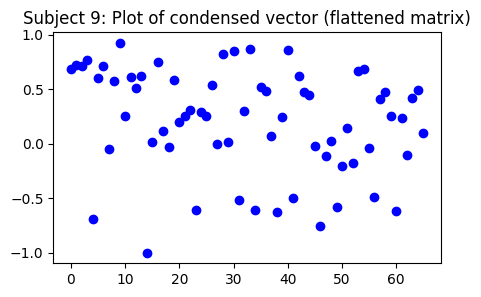

229 subs with symptom matrices
229 filled condensed arrays


DATAFRAME: v2_day_mis
dropping cols: ['phq2_1', 'phq2_2', 'phq2_1_missing', 'phq2_2_missing']
In df there are 65 subjects.


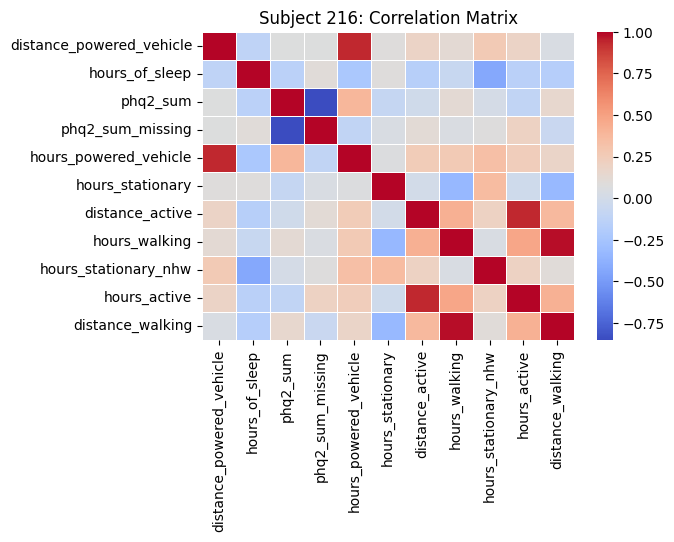

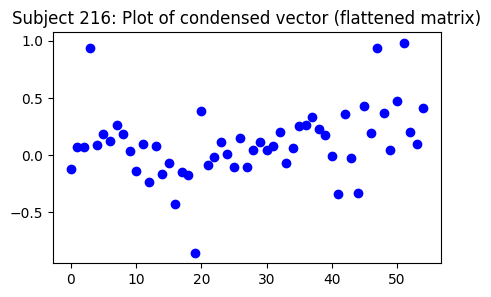

65 subs with symptom matrices
65 filled condensed arrays


DATAFRAME: v1_week_mis
dropping cols: ['phq2_1', 'phq2_2', 'phq9_1', 'phq9_2', 'phq9_3', 'phq9_4', 'phq9_5', 'phq9_6', 'phq9_7', 'phq9_8', 'phq9_9', 'phq2_1_missing', 'phq2_2_missing', 'phq9_1_missing', 'phq9_2_missing', 'phq9_3_missing', 'phq9_4_missing', 'phq9_5_missing', 'phq9_6_missing', 'phq9_7_missing', 'phq9_8_missing', 'phq9_9_missing']
In df there are 233 subjects.


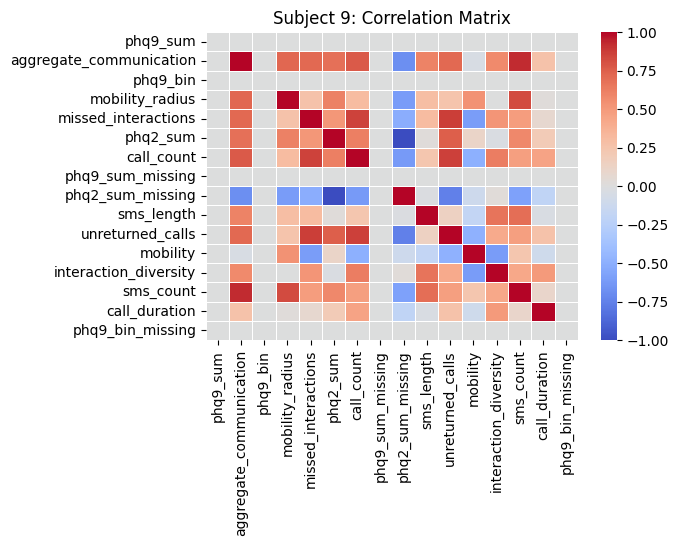

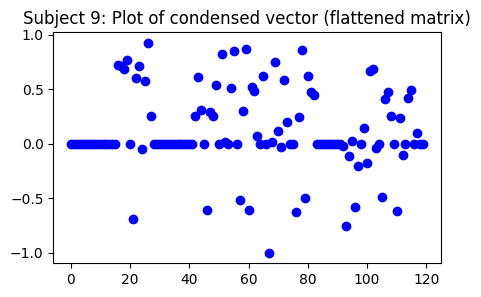

229 subs with symptom matrices
229 filled condensed arrays


DATAFRAME: v2_week_mis
dropping cols: ['phq2_1', 'phq2_2', 'phq9_1', 'phq9_2', 'phq9_3', 'phq9_4', 'phq9_5', 'phq9_6', 'phq9_7', 'phq9_8', 'phq9_9', 'phq2_1_missing', 'phq2_2_missing', 'phq9_1_missing', 'phq9_2_missing', 'phq9_3_missing', 'phq9_4_missing', 'phq9_5_missing', 'phq9_6_missing', 'phq9_7_missing', 'phq9_8_missing', 'phq9_9_missing']
In df there are 65 subjects.


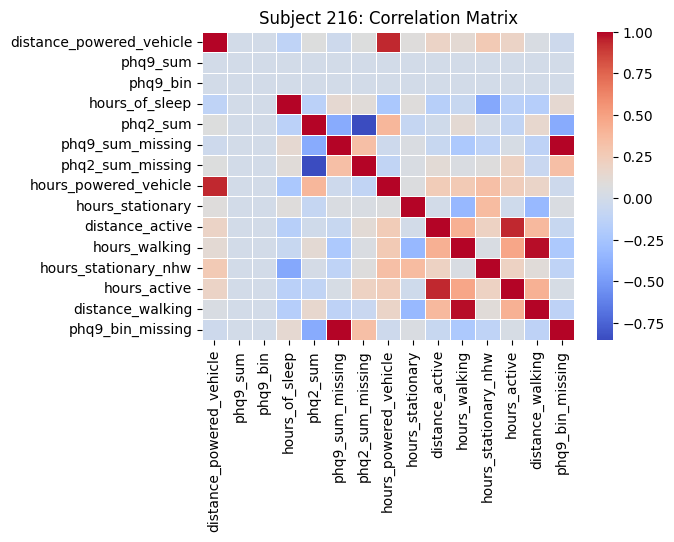

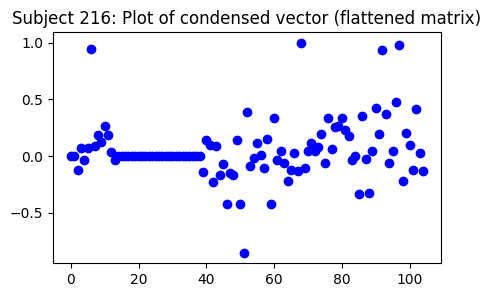

65 subs with symptom matrices
65 filled condensed arrays


In [21]:
## Only keep summed columns
phq_keep_cols = ['phq2_sum', 'phq2_bin', 'phq9_sum', 'phq9_bin']
drop_cols_mis = [f'{col}_missing' for col in survey_cols if col not in phq_keep_cols]
drop_cols = [col for col in survey_cols if col not in phq_keep_cols]
symptom_matrices_df_dict = {}
flattened_matrices_df_dict = {}
demographic_vars = ['gender','education','race','age']                # covariates


# Create dicts of all subjects' correlation matrices but without excess phq cols
for name in df_mis:
    df_scaled = pd.read_csv(os.path.join(brighten_dir, f'{name}_scaled.csv'))
    print(f'\n\nDATAFRAME: {name}')
    df_cleaned = df_scaled.drop(columns=[col for col in df_scaled.columns.to_list() if col in drop_cols or col in drop_cols_mis])
    print('dropping cols:', [col for col in df_scaled.columns.to_list() if col in drop_cols or col in drop_cols_mis])
    ignore_cols = demographic_vars + id_columns
    symptom_matrix_dict, flattened_matrix_dict = fs.make_symptom_matrices(df_cleaned, ignore_cols, num_to_plot=1)
    symptom_matrices_df_dict[name] = symptom_matrix_dict
    flattened_matrices_df_dict[name] = flattened_matrix_dict



v1_day_mis
(12, 12) variables included


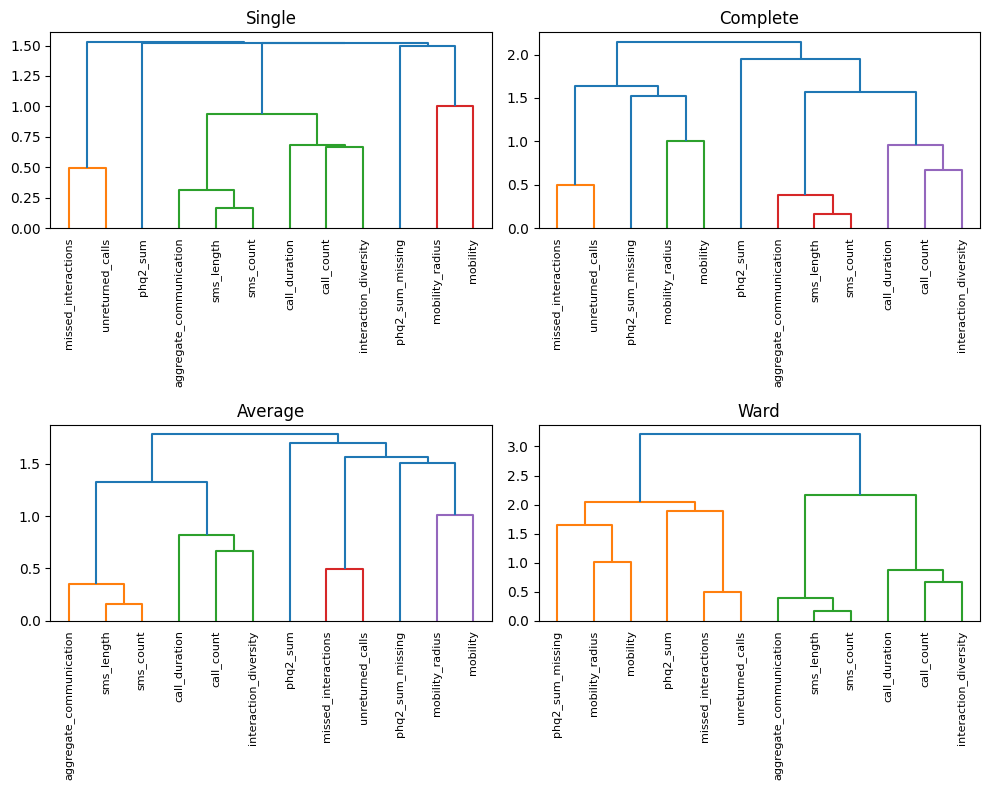

v2_day_mis
(11, 11) variables included


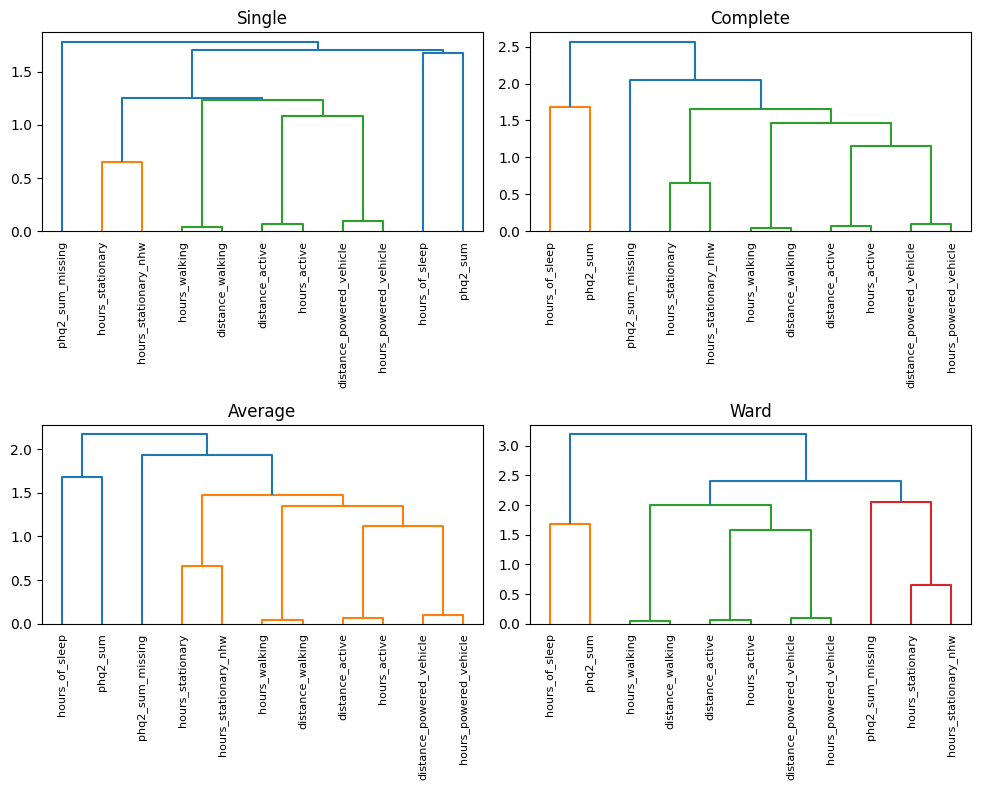

v1_week_mis
(16, 16) variables included


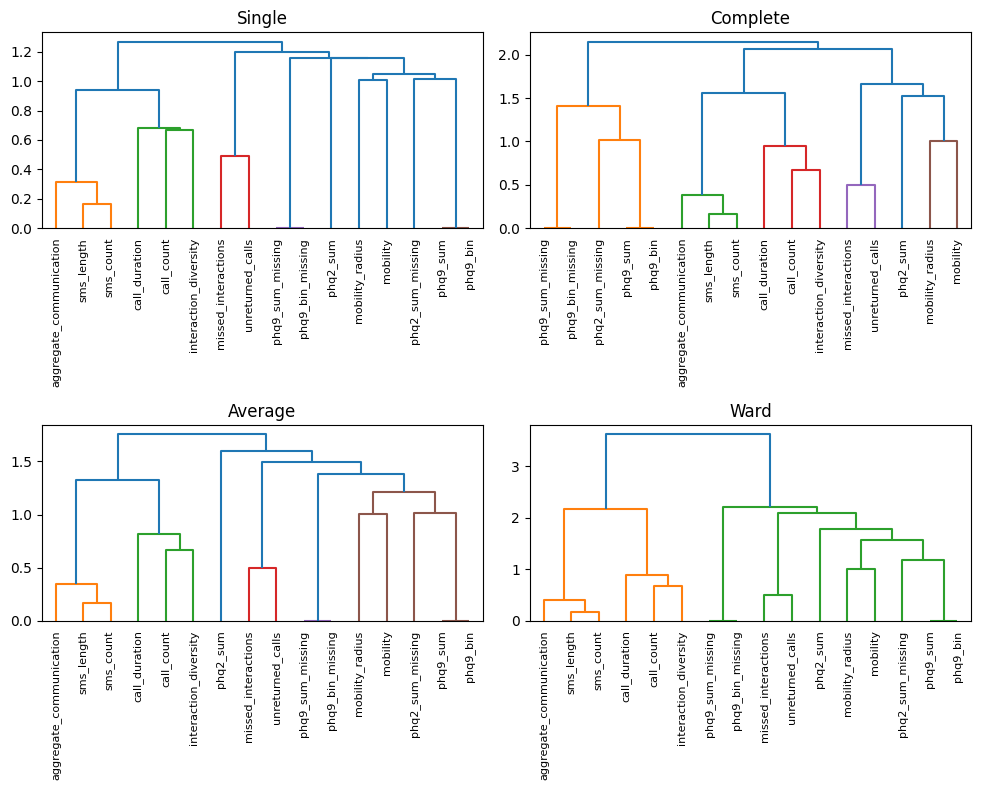

v2_week_mis
(15, 15) variables included


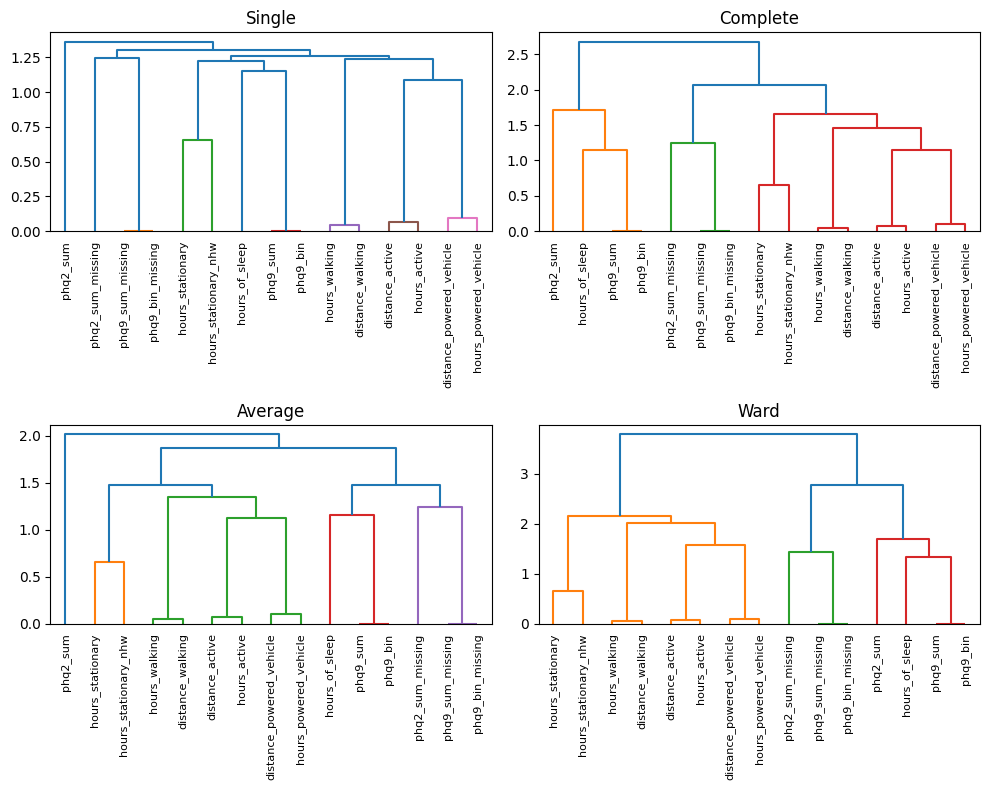

In [22]:
## Plot options
for name, df in symptom_matrices_df_dict.items():
    avg_matrix = fs.average_matrix(df)
    fs.plot_hier_agg(avg_matrix, df[list(df.keys())[0]].index, is_dict=False, group_title=f'{name}') # 3, ward


In [23]:
################# Create cluster_dict of Variables + Cluster Labels ############

clust_dict_mis = {}
# clust_dict['v1_day'] = v1_day_clust_dict
for name, dictionary in symptom_matrices_df_dict.items():
    avg_matrix = fs.average_matrix(dictionary)
    if 'v1_day' in name:
        clust_dict_mis[name] = fs.hier_agg_clustering(avg_matrix, dictionary[list(dictionary.keys())[0]].index, n_clusters=6, linkage='average', is_dict=False)
    if 'v1_week' in name:
        clust_dict_mis[name] = fs.hier_agg_clustering(avg_matrix, dictionary[list(dictionary.keys())[0]].index, n_clusters=6, linkage='single', is_dict=False)
    if 'v2_day' in name :
       clust_dict_mis[name] = fs.hier_agg_clustering(avg_matrix, dictionary[list(dictionary.keys())[0]].index, n_clusters=4, linkage='single', is_dict=False)
    if 'v2_week' in name :
       clust_dict_mis[name] = fs.hier_agg_clustering(avg_matrix, dictionary[list(dictionary.keys())[0]].index, n_clusters=9, linkage='single', is_dict=False)



In [27]:

################# Create df_pca of Variables + 1st PC of clusters Labels ############

dfs_pca_mis = {}
dfs_pca_dict_mis = {}
for name in df_mis:
    df_scaled = pd.read_csv(os.path.join(brighten_dir, f'{name}_scaled.csv'))
    name = name.replace('_residuals_scaled','')
    print(f'\nFor {name}')
    dfs_pca_mis[name], dfs_pca_dict_mis[name] = fs.pca_on_clusters(df_scaled, clust_dict_mis[name], n_clusters=9)



For v1_day_mis
Cols for cluster 0: ['mobility', 'mobility_radius']
Cols for cluster 1: ['call_count', 'call_duration', 'interaction_diversity']
Cols for cluster 2: ['aggregate_communication', 'sms_count', 'sms_length']
Cols for cluster 3: ['missed_interactions', 'unreturned_calls']
Cols for cluster 4: ['phq2_sum_missing']
Cols for cluster 5: ['phq2_sum']
Skipping cluster 6: No variables assigned.
Skipping cluster 7: No variables assigned.
Skipping cluster 8: No variables assigned.

For v2_day_mis
Cols for cluster 0: ['distance_walking', 'hours_active', 'distance_active', 'distance_powered_vehicle', 'hours_powered_vehicle', 'hours_stationary', 'hours_stationary_nhw', 'hours_walking']
Cols for cluster 1: ['phq2_sum_missing']
Cols for cluster 2: ['hours_of_sleep']
Cols for cluster 3: ['phq2_sum']
Skipping cluster 4: No variables assigned.
Skipping cluster 5: No variables assigned.
Skipping cluster 6: No variables assigned.
Skipping cluster 7: No variables assigned.
Skipping cluster 8: No

In [32]:
# # Name the clusters
dfs_pca_dict_mis['v1_day_mis'][0]['name']= 'pc_mobility'
dfs_pca_dict_mis['v1_day_mis'][1]['name']= 'pc_calls'
dfs_pca_dict_mis['v1_day_mis'][2]['name']= 'pc_sms'
dfs_pca_dict_mis['v1_day_mis'][3]['name']= 'pc_missed_calls'
dfs_pca_dict_mis['v1_day_mis'][4]['name']= 'pc_depression2'
dfs_pca_dict_mis['v1_day_mis'][5]['name']= 'pc_dep2_missing'

dfs_pca_dict_mis['v2_day_mis'][0]['name']= 'pc_activity'
dfs_pca_dict_mis['v2_day_mis'][1]['name']= 'pc_dep2_missing'
dfs_pca_dict_mis['v2_day_mis'][2]['name']= 'pc_sleep_hours'
dfs_pca_dict_mis['v2_day_mis'][3]['name']= 'pc_depression2'

dfs_pca_dict_mis['v1_week_mis'][0]['name']= 'pc_depression9'
dfs_pca_dict_mis['v1_week_mis'][1]['name']= 'pc_communication'
dfs_pca_dict_mis['v1_week_mis'][2]['name']= 'pc_mobility'
dfs_pca_dict_mis['v1_week_mis'][3]['name']= 'pc_dep9_missing'
dfs_pca_dict_mis['v1_week_mis'][4]['name']= 'pc_depression2'
dfs_pca_dict_mis['v1_week_mis'][5]['name']= 'pc_missed_calls'

dfs_pca_dict_mis['v2_week_mis'][0]['name']= 'pc_stationary_hours'
dfs_pca_dict_mis['v2_week_mis'][1]['name']= 'pc_vehicle'
dfs_pca_dict_mis['v2_week_mis'][2]['name']= 'pc_activity'
dfs_pca_dict_mis['v2_week_mis'][3]['name']= 'pc_dep9_missing'
dfs_pca_dict_mis['v2_week_mis'][4]['name']= 'pc_dep2_missing'
dfs_pca_dict_mis['v2_week_mis'][5]['name']= 'pc_walking'
dfs_pca_dict_mis['v2_week_mis'][6]['name']= 'pc_sleep_hours'
dfs_pca_dict_mis['v2_week_mis'][7]['name']= 'pc_depression2'
dfs_pca_dict_mis['v2_week_mis'][8]['name']= 'pc_depression9'



for name in df_mis:
    df_scaled = pd.read_csv(os.path.join(brighten_dir, f'{name}_scaled.csv'))
    dfs_pca_mis[name] = fs.merge_df_via_cluster_pca_dict(df_scaled, dfs_pca_dict_mis[name], on_columns=['num_id', 'dt', 'week'])
    dfs_pca_mis[name].to_csv(os.path.join(brighten_dir, f'{name}_pca.csv'), index=False)




/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


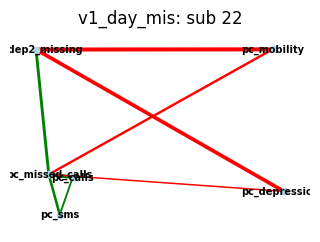

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


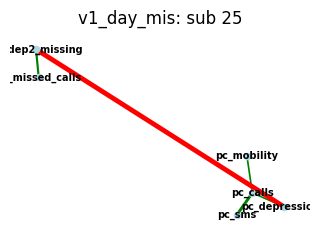

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


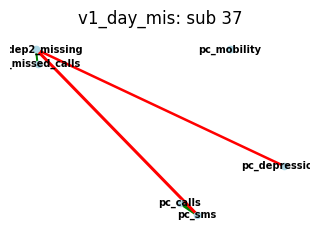

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


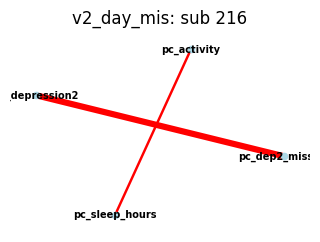

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


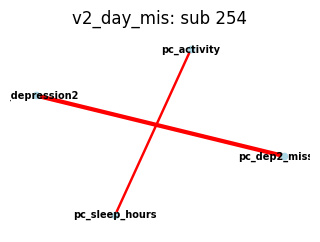

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


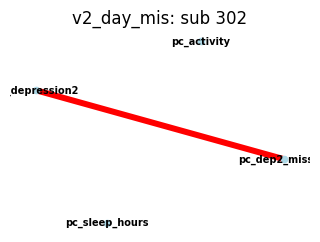

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


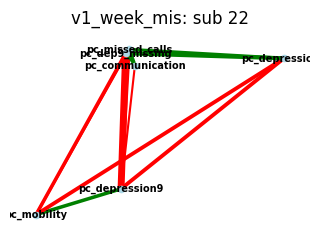

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


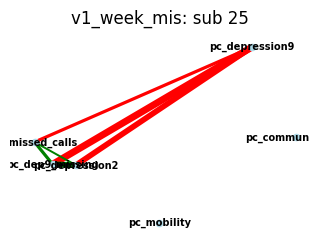

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


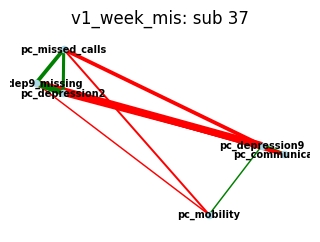

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


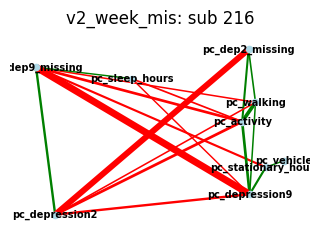

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


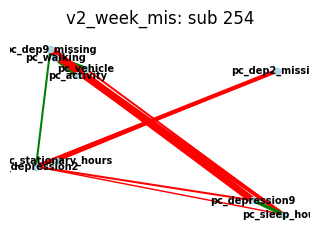

/Users/demo/Library/CloudStorage/Box-Box/Holmes_lab_kaley/motif_proj/smartphone_sensor_predictive_modeling/scripts/feature_selection.py:377: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


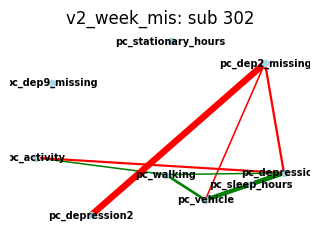

In [33]:
############ Plot subjects' individual networks of PCs ############

for name, df in dfs_pca_mis.items():
    count=0
    cols=[col for col in df.columns.to_list() if 'pc_' in col]
    for sub in df['num_id'].unique():
        sub_df = df[df['num_id']==sub]
        if sub_df.shape[0] > 8:
            if count<3:
                if 'v1' in name:
                    fs.plot_network(sub_df, cols, title=f'{name}: sub {sub}', threshold=0.2)
                    count+=1
                elif 'v2' in name:
                    fs.plot_network(sub_df, cols, title=f'{name}: sub {sub}', threshold=0.2)
                    count+=1
